#Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = "/content/drive/My Drive/Colab Notebooks/FoodOutBreak_finalproject"
!ls "/content/drive/My Drive/Colab Notebooks/FoodOutBreak_finalproject"

FoodOutBreak_1120.ipynb  FoodOutBreak_State.ipynb	      Weather.ipynb
FoodOutBreak.ipynb	 NationalOutbreakPublicDataFood.xlsx  無標題文件.gdoc
FoodOutBreak_RL.ipynb	 us_pop_1998_2019.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Food Outbreak Data

In [ ]:
foodOutBreak = pd.DataFrame()
foodOutBreak = pd.read_excel(data_dir+"/NationalOutbreakPublicDataFood.xlsx")

In [ ]:
foodOutBreak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21929 entries, 0 to 21928
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          21929 non-null  int64  
 1   Month                         21929 non-null  int64  
 2   State                         21929 non-null  object 
 3   Primary Mode                  21929 non-null  object 
 4   Etiology                      14714 non-null  object 
 5   Serotype or Genotype          4830 non-null   object 
 6   Etiology Status               14714 non-null  object 
 7   Setting                       20775 non-null  object 
 8   Illnesses                     21929 non-null  int64  
 9   Hospitalizations              18256 non-null  float64
 10  Info on Hospitalizations      8279 non-null   float64
 11  Deaths                        18297 non-null  float64
 12  Info on Deaths                8319 non-null   float64
 13  F

In [ ]:
data = pd.DataFrame()
data = foodOutBreak.drop(["Serotype or Genotype","Food Vehicle","Food Contaminated Ingredient","Food Contaminated Ingredient","IFSAC Category","Water Exposure","Water Type","Animal Type","Animal Type Specify","Water Status"], axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21929 entries, 0 to 21928
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      21929 non-null  int64  
 1   Month                     21929 non-null  int64  
 2   State                     21929 non-null  object 
 3   Primary Mode              21929 non-null  object 
 4   Etiology                  14714 non-null  object 
 5   Etiology Status           14714 non-null  object 
 6   Setting                   20775 non-null  object 
 7   Illnesses                 21929 non-null  int64  
 8   Hospitalizations          18256 non-null  float64
 9   Info on Hospitalizations  8279 non-null   float64
 10  Deaths                    18297 non-null  float64
 11  Info on Deaths            8319 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
display(data)

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2009,1,Minnesota,Food,Norovirus,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0
1,2009,1,Minnesota,Food,Norovirus,Confirmed,NaN,16,0.0,8.0,0.0,16.0
2,2009,1,Minnesota,Food,Norovirus,Suspected,Restaurant - Sit-down dining,5,0.0,5.0,0.0,5.0
3,2009,1,Minnesota,Food,Norovirus,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,3.0,0.0,3.0
4,2009,1,Minnesota,Food,Norovirus,Confirmed,Restaurant - other or unknown type,21,0.0,21.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21924,2018,12,California,Food,Norovirus unknown,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7.0
21925,2018,7,California,Food,Clostridium perfringens,Suspected,Restaurant - Sit-down dining,7,0.0,7.0,0.0,7.0
21926,2018,12,California,Food,NaN,NaN,Restaurant - Sit-down dining,4,0.0,4.0,0.0,4.0
21927,2018,2,Multistate,Food,Listeria monocytogenes; Listeria monocytogenes,Confirmed; Confirmed,Unknown,11,9.0,9.0,2.0,9.0


In [ ]:
data["ratio_h"] = data["Hospitalizations"]/data["Illnesses"]
data["ratio_d"] = data["Deaths"]/data["Illnesses"]
data.describe()

,Year,Month,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,ratio_h,ratio_d
count,21929.000000,21929.000000,21929.000000,18256.000000,8279.000000,18297.000000,8319.000000,18256.000000,18297.000000
mean,2007.029596,6.434949,19.323043,1.002848,14.991062,0.023829,15.500301,0.072077,0.002464
std,6.161490,3.429686,48.393483,5.450496,32.250551,0.371245,33.174540,0.183371,0.033901
min,1998.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,4.000000,3.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000
50%,2006.000000,6.000000,8.000000,0.000000,6.000000,0.000000,7.000000,0.000000,0.000000
75%,2012.000000,9.000000,19.000000,1.000000,15.000000,0.000000,16.000000,0.017583,0.000000
max,2018.000000,12.000000,1939.000000,308.000000,800.000000,33.000000,800.000000,2.333333,1.000000


## US Population Data

https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295

https://www.census.gov/content/census/en/data/datasets/time-series/demo/popest/intercensal-2000-2010-state.html

https://www.census.gov/content/census/en/data/datasets/time-series/demo/popest/intercensal-1990-2000-state-and-county-characteristics.html


In [ ]:
pop = pd.read_csv(data_dir+'/us_pop_1998_2019.csv',index_col='state')
pop = pop.astype(int)
#pop.iloc[:,1:] = pop.iloc[:,1:].astype(int)
pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1998    52 non-null     int64
 1   1999    52 non-null     int64
 2   2000    52 non-null     int64
 3   2001    52 non-null     int64
 4   2002    52 non-null     int64
 5   2003    52 non-null     int64
 6   2004    52 non-null     int64
 7   2005    52 non-null     int64
 8   2006    52 non-null     int64
 9   2007    52 non-null     int64
 10  2008    52 non-null     int64
 11  2009    52 non-null     int64
 12  2010    52 non-null     int64
 13  2011    52 non-null     int64
 14  2012    52 non-null     int64
 15  2013    52 non-null     int64
 16  2014    52 non-null     int64
 17  2015    52 non-null     int64
 18  2016    52 non-null     int64
 19  2017    52 non-null     int64
 20  2018    52 non-null     int64
 21  2019    52 non-null     int64
dtypes: int64(22)
memory usage: 9.3+ KB


In [ ]:
pop 


,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
state,,,,,,,,,,,,,,,,,,,,,,
Alabama,4366180,4408967,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
Alaska,615834,621869,627963,633714,642337,648414,659286,666946,675302,680300,687455,698895,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
Arizona,5060910,5110505,5160586,5273477,5396255,5510364,5652404,5839077,6029141,6167681,6280362,6343154,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
Arkansas,2626851,2652594,2678588,2691571,2705927,2724816,2749686,2781097,2821761,2848650,2874554,2896843,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
California,33331505,33658140,33987977,34479458,34871843,35253159,35574576,35827943,36021202,36250311,36604337,36961229,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
Colorado,4243347,4284930,4326921,4425687,4490406,4528732,4575013,4631888,4720423,4803868,4889730,4972195,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
Connecticut,3345879,3378667,3411777,3432835,3458749,3484336,3496094,3506956,3517460,3527270,3545579,3561807,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
Delaware,771184,778742,786373,795699,806169,818003,830803,845150,859268,871749,883874,891730,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
Florida,15737560,15891782,16047515,16356966,16689370,17004085,17415318,17842038,18166990,18367842,18527305,18652644,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737


# Data Cleaning

##Setting new catogory of etiology

In [ ]:
# Setting new catogory of etiology
data["Etiology"].unique()

array(['Norovirus', 'Norovirus Genogroup II', 'Campylobacter jejuni',
       'Norovirus Genogroup I; Norovirus Genogroup II', 'Bacillus cereus',
       nan, 'Salmonella enterica', 'Norovirus Genogroup I',
       'Shigella sonnei', 'Escherichia coli, Shiga toxin-producing',
       'Norovirus unknown', 'Staphylococcus aureus',
       'Campylobacter jejuni; Listeria monocytogenes',
       'Clostridium perfringens', 'Histamine',
       'Norovirus unknown; Staphylococcus unknown', 'Mycotoxins',
       'Other - Bacterium', 'Enterococcus faecalis',
       'Campylobacter unknown', 'Escherichia coli, Enterotoxigenic',
       'Brucella unknown', 'Scombroid toxin', 'Other - Chemical/Toxin',
       'Ciguatoxin', 'Hepatitis A',
       'Salmonella enterica; Salmonella enterica',
       'Cyclospora cayetanensis', 'Pesticides', 'Rotavirus',
       'Escherichia coli, Enteroaggregative; Escherichia coli, Enterotoxigenic; Shigella sonnei',
       'Staphylococcus aureus; Clostridium perfringens; Salmonell

In [ ]:
etiology = [      
           "Campylobacter", #Campylobacter jejuni, Campylobacter unknown, Campylobacter other, Campylobacter fetus, Campylobacter coli, Campylobacter lari
           "Bacillus",#Bacillus cereu, Bacillus, Bacillus other, Bacillus unknown
           "Salmonella",#Salmonella enterica, Salmonella other, Salmonella unknown
           "Shigella", #Shigella,Shigella sonnei,Shigella flexneri,Shigella boydii, Shiga toxin-producing,Shigella unknown, Shigella dysenteriae
           "Escherichia", #Enterotoxigenic, Enteroaggregative, Enteropathogenic, Enteroinvasive
           "Staphylococcus", #Staphylococcus unknown, Staphylococcus aureus, Staphylococcus other
           "Listeria", #Listeria monocytogenes, Listeria unknown
           "Clostridium",#Clostridium perfringens, Clostridium botulinum, Clostridium other
           "Enterococcus faecalis",
           "Brucella", #Brucella unknown, Brucella
           "Cyclospora", #Cyclospora cayetanensis, Cyclospora
           "Vibrio", #Vibrio parahaemolyticus, Vibrio other, Vibrio cholerae, Vibrio unknown, Vibrio vulnificus, Vibrio       
           "Trichinella", #Trichinella unknown, Trichinella spiralis, Trichinella
           "Giardia", #Giardia duodenalis, Giardia unknown, Giardia
           "Yersinia", #Yersinia enterocolitica, Yersinia
           "Streptococcus", #Streptococcus Group A, Group B, C or G
           "Toxoplasma", #Toxoplasma, Toxoplasma gondii
           "Cryptosporidium", #Cryptosporidium hominis, Cryptosporidium parvum, Cryptosporidium unknown, Cryptosporidium
           "Enterobacter", #Enterobacter cloacae, Enterobacter other
           "Other Bacterium", #Other - Bacterium
           "Norovirus & Sapovirus", #Norovirus Genogroup I, Norovirus Genogroup II,Norovirus unknown, Genogroup IV, Norovirus other, Sapovirus unknown, Sapovirus Genogroup I, Sapovirus
           "Rotavirus",
           "Other Virus", #Virus, Astrovirus, Adenovirus, Hepatitis A
           "Seafood Toxin", #Ciguatoxin, Paralytic shellfish poison, Amnesic shellfish poison, Neurotoxic shellfish poison, Puffer fish tetrodotoxin        
           "Other_e"
            #Parasite, Heavy metals, Pesticides, Plant/Herbal toxins, Anisakis, Cleaning agents,  Chemical/Toxin,Scombroid toxin, Other, Monosodium glutamate (MSG),Histamine,Mycotoxins
           # "No Record" #nan
           ]

In [ ]:
data["Campylobacter"] = data["Etiology"].str.contains("Campylobacter")
data["Bacillus"] = data["Etiology"].str.contains("Bacillus")
data["Salmonella"] = data["Etiology"].str.contains("Salmonella")
data["Shigella"] = data["Etiology"].str.contains("Shigella")
data["Escherichia"] = data["Etiology"].str.contains("Escherichia|Enterotoxigenic|Enteroaggregative|Enteropathogenic|Enteroinvasive")
data["Staphylococcus"] = data["Etiology"].str.contains("Staphylococcus")
data["Listeria"] = data["Etiology"].str.contains("Listeria")
data["Clostridium"] = data["Etiology"].str.contains("Clostridium")
data["Enterococcus faecalis"] = data["Etiology"].str.contains("Enterococcus faecalis")
data["Brucella"] = data["Etiology"].str.contains("Brucella")
data["Cyclospora"] = data["Etiology"].str.contains("Cyclospora")
data["Vibrio"] = data["Etiology"].str.contains("Vibrio")
data["Trichinella"] = data["Etiology"].str.contains("Trichinella")
data["Giardia"] = data["Etiology"].str.contains("Giardia")
data["Yersinia"] = data["Etiology"].str.contains("Yersinia")
data["Streptococcus"] = data["Etiology"].str.contains("Streptococcus")
data["Toxoplasma"] = data["Etiology"].str.contains("Toxoplasma")
data["Cryptosporidium"] = data["Etiology"].str.contains("Cryptosporidium")
data["Enterobacter"] = data["Etiology"].str.contains("Enterobacter")
data["Other Bacterium"] = data["Etiology"].str.contains("Other - Bacterium")
data["Norovirus & Sapovirus"] = data["Etiology"].str.contains("Norovirus|Sapovirus") #| data_e["Etiology"].str.contains("Sapovirus")
data["Rotavirus"] = data["Etiology"].str.contains("Rotavirus")
data["Other Virus"] = data["Etiology"].str.contains("Virus|Astrovirus|Adenovirus|Hepatitis A")
data["Seafood Toxin"] = data["Etiology"].str.contains("Ciguatoxin|Paralytic shellfish poison|Amnesic shellfish poison|Neurotoxic shellfish poison|Puffer fish tetrodotoxin")
data["Other_e"] = data["Etiology"].str.contains("Parasite|Heavy metals|Pesticides|Plant/Herbal toxins|Anisakis|Cleaning agents|Chemical/Toxin|Scombroid toxin|Monosodium glutamate|Histamine|Mycotoxins")
#data["No Record"] = data["Etiology"].str.contains("nan")

In [ ]:
# Using 1/0 to represent True/False
def replace_boolean(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_boolean(data)


##Setting new catogory of setting

In [ ]:
# Setting new catogory of setting
data["Setting"].unique()

array(['Restaurant - Sit-down dining', nan,
       'Restaurant - "Fast-food"(drive up service or pay at counter)',
       'Restaurant - other or unknown type', 'Private home/residence',
       'Caterer (food prepared off-site from where served)',
       'Grocery store; Other', 'Other',
       'Restaurant - Sit-down dining; Caterer (food prepared off-site from where served)',
       'Grocery store',
       'Banquet Facility (food prepared and served on-site)',
       'Restaurant - other or unknown type; Caterer (food prepared off-site from where served)',
       'Long-term care/nursing home/assisted living facility',
       'Private home/residence; Caterer (food prepared off-site from where served); School/college/university',
       'Private home/residence; Banquet Facility (food prepared and served on-site)',
       'Office/indoor workplace',
       'Restaurant - other or unknown type; Banquet Facility (food prepared and served on-site)',
       'Restaurant - other or unknown type; Pr

In [ ]:
setting = [
           "Restaurant", #Restaurant - Sit-down dining, other or unknown type
           "Fast Food", # Restaurant,- Fast-food(drive up service or pay at counter),
           "Caterer", #(food prepared off-site from where served), 
           "Grocery", #Grocery store
           "Private residence", #Private home/residence
           "Banquet", #(food prepared and served on-site)
           "Mobile services",# Fair, festival other temp or mobile services",
           "Workplace",#"Office/indoor workplace",
           "Nursing facility", #Long-term care/nursing home/assisted living facility",
           "School",# /college/university
           "Camp", #Camp
           "Prison", #Prison/jail
           'Religious facility',
           "Hospital",
           "Child daycare",
           "Ship", #Ship/boat
           "Hotel/motel",
           "Other_s"
           #"nan"
           ]

In [ ]:
data["Restaurant"] = data["Setting"].str.contains("Restaurant")
data["Fast Food"] = data["Setting"].str.contains("Fast")
data["Caterer"] = data["Setting"].str.contains("Caterer")
data["Grocery"] = data["Setting"].str.contains("Grocery")
data["Private residence"] = data["Setting"].str.contains("Private home/residence")
data["Banquet"] = data["Setting"].str.contains("Banquet")
data["Mobile Services"] = data["Setting"].str.contains("festival")
data["Workplace"] = data["Setting"].str.contains("workplace")
data["Nursing facility"] = data["Setting"].str.contains("nursing")
data["School"] = data["Setting"].str.contains("School/college/university")
data["Camp"] = data["Setting"].str.contains("Camp")
data["Prison"] = data["Setting"].str.contains("Prison")
data["Religious facility"] = data["Setting"].str.contains("Religious")
data["Hospital"] = data["Setting"].str.contains("Hospital")
data["Child day care"] = data["Setting"].str.contains("Child day care")
data["Ship"] = data["Setting"].str.contains("Ship/boat")
data["Hotel/motel"] = data["Setting"].str.contains("Hotel/motel")
data["Other_s"] = data["Setting"].str.contains("Other|Unknown")
#data["S_No Record"] = data["Setting"].str.contains("nan")


In [ ]:
# Using 1/0 to represent True/False
def replace_boolean(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_boolean(data)


## Drop nan row in col 'Etiology' & 'Setting' 

In [ ]:
#drop nan row in col 'Etiology' & 'Setting' 
data = data[data['Etiology'].notna()]
data = data[data['Setting'].notna()]

In [ ]:
data.head()

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,ratio_h,ratio_d,Campylobacter,Bacillus,Salmonella,Shigella,Escherichia,Staphylococcus,Listeria,Clostridium,Enterococcus faecalis,Brucella,Cyclospora,Vibrio,Trichinella,Giardia,Yersinia,Streptococcus,Toxoplasma,Cryptosporidium,Enterobacter,Other Bacterium,Norovirus & Sapovirus,Rotavirus,Other Virus,Seafood Toxin,Other_e,Restaurant,Fast Food,Caterer,Grocery,Private residence,Banquet,Mobile Services,Workplace,Nursing facility,School,Camp,Prison,Religious facility,Hospital,Child day care,Ship,Hotel/motel,Other_s
0,2009,1,Minnesota,Food,Norovirus,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,1,Minnesota,Food,Norovirus,Suspected,Restaurant - Sit-down dining,5,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009,1,Minnesota,Food,Norovirus,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,1,Minnesota,Food,Norovirus,Confirmed,Restaurant - other or unknown type,21,0.0,21.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2009,1,Minnesota,Food,Norovirus,Confirmed,Restaurant - other or unknown type,7,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Delet the 'State' that is not in the US


In [ ]:
data['State'].unique()

array(['Minnesota', 'Alaska', 'Alabama', 'Illinois', 'Pennsylvania',
       'Tennessee', 'New York', 'Massachusetts', 'Florida', 'Wisconsin',
       'Ohio', 'New Hampshire', 'Idaho', 'Michigan', 'Connecticut',
       'Oklahoma', 'South Carolina', 'Oregon', 'Hawaii', 'Mississippi',
       'California', 'Virginia', 'Arizona', 'Maryland', 'Georgia',
       'Missouri', 'Utah', 'Colorado', 'North Carolina', 'Kansas',
       'Nevada', 'North Dakota', 'Maine', 'Washington', 'Texas',
       'West Virginia', 'Puerto Rico', 'New Jersey', 'Wyoming',
       'Rhode Island', 'Vermont', 'Iowa', 'New Mexico', 'Multistate',
       'Kentucky', 'Montana', 'South Dakota', 'Delaware', 'Indiana',
       'Nebraska', 'Louisiana', 'Arkansas', 'Republic of Palau',
       'Washington DC', 'Guam'], dtype=object)

In [ ]:
state_not_use = ['Puerto Rico', 'Republic of Palau', 'Guam']
data_inUS = data[~data.State.isin(state_not_use)]
data_inUS['State'].unique()

array(['Minnesota', 'Alaska', 'Alabama', 'Illinois', 'Pennsylvania',
       'Tennessee', 'New York', 'Massachusetts', 'Florida', 'Wisconsin',
       'Ohio', 'New Hampshire', 'Idaho', 'Michigan', 'Connecticut',
       'Oklahoma', 'South Carolina', 'Oregon', 'Hawaii', 'Mississippi',
       'California', 'Virginia', 'Arizona', 'Maryland', 'Georgia',
       'Missouri', 'Utah', 'Colorado', 'North Carolina', 'Kansas',
       'Nevada', 'North Dakota', 'Maine', 'Washington', 'Texas',
       'West Virginia', 'New Jersey', 'Wyoming', 'Rhode Island',
       'Vermont', 'Iowa', 'New Mexico', 'Multistate', 'Kentucky',
       'Montana', 'South Dakota', 'Delaware', 'Indiana', 'Nebraska',
       'Louisiana', 'Arkansas', 'Washington DC'], dtype=object)

##Incidence Rate


*   cases per 1,000 persons




In [ ]:
state_year_group = data_inUS.groupby(['State','Year']).sum()
state_year_group.head()

Month  Illnesses  Hospitalizations  ...  Ship  Hotel/motel  Other_s
State   Year                                      ...                            
Alabama 1999      9        144               0.0  ...   0.0          0.0      0.0
        2000     30        159               6.0  ...   0.0          0.0      0.0
        2001     10          5               0.0  ...   0.0          0.0      1.0
        2002     14         11               0.0  ...   0.0          0.0      0.0
        2003      6          2               0.0  ...   0.0          0.0      0.0

[5 rows x 51 columns]

In [ ]:
unstack_state_year_group = state_year_group['Illnesses'].unstack(0)
unstack_state_year_group.fillna(0, inplace = True)
unstack_state_year_group.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Multistate,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998,0.0,3.0,58.0,4.0,1280.0,423.0,15.0,0.0,1346.0,207.0,118.0,18.0,1212.0,208.0,162.0,194.0,71.0,483.0,6.0,522.0,239.0,85.0,618.0,33.0,0.0,0.0,1186.0,45.0,85.0,112.0,120.0,70.0,477.0,374.0,92.0,796.0,29.0,413.0,185.0,0.0,47.0,6.0,264.0,670.0,43.0,4.0,315.0,127.0,88.0,111.0,412.0,0.0
1999,144.0,191.0,290.0,240.0,2584.0,251.0,68.0,0.0,809.0,534.0,117.0,33.0,559.0,467.0,332.0,6.0,9.0,97.0,6.0,916.0,147.0,121.0,558.0,4.0,101.0,0.0,951.0,242.0,0.0,167.0,176.0,111.0,670.0,352.0,85.0,1601.0,25.0,432.0,553.0,0.0,0.0,0.0,220.0,355.0,322.0,12.0,345.0,566.0,0.0,154.0,620.0,0.0
2000,159.0,65.0,72.0,132.0,2547.0,395.0,102.0,0.0,971.0,1036.0,95.0,88.0,1305.0,379.0,355.0,20.0,14.0,155.0,21.0,358.0,118.0,660.0,716.0,126.0,59.0,0.0,848.0,10.0,0.0,0.0,59.0,66.0,926.0,84.0,0.0,1580.0,40.0,499.0,717.0,0.0,172.0,189.0,878.0,410.0,55.0,31.0,526.0,238.0,108.0,43.0,1106.0,0.0
2001,5.0,100.0,159.0,75.0,1855.0,514.0,449.0,0.0,1277.0,1031.0,156.0,29.0,860.0,104.0,172.0,168.0,0.0,297.0,130.0,410.0,452.0,737.0,789.0,0.0,26.0,0.0,315.0,24.0,329.0,0.0,208.0,0.0,1715.0,217.0,0.0,1229.0,72.0,741.0,454.0,152.0,796.0,21.0,1327.0,816.0,48.0,19.0,804.0,407.0,21.0,116.0,534.0,77.0
2002,11.0,109.0,85.0,196.0,3164.0,253.0,164.0,21.0,985.0,363.0,193.0,51.0,2378.0,628.0,227.0,298.0,6.0,87.0,112.0,330.0,595.0,559.0,957.0,87.0,226.0,0.0,817.0,10.0,69.0,38.0,113.0,4.0,760.0,652.0,541.0,676.0,0.0,370.0,321.0,0.0,66.0,42.0,647.0,1399.0,271.0,66.0,402.0,759.0,221.0,29.0,627.0,343.0


In [ ]:
state_year_data = pd.DataFrame()

for col in unstack_state_year_group :
  a_row = pd.Series(unstack_state_year_group [col])
  row_of_df = pd.DataFrame([a_row])
  state_year_data = pd.concat([state_year_data, row_of_df], ignore_index=False)

state_year_data.head()


Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Alabama,0.0,144.0,159.0,5.0,11.0,2.0,0.0,32.0,741.0,48.0,103.0,58.0,0.0,54.0,35.0,124.0,240.0,162.0,331.0,94.0,7.0
Alaska,3.0,191.0,65.0,100.0,109.0,47.0,92.0,18.0,57.0,27.0,113.0,35.0,9.0,42.0,5.0,46.0,89.0,3.0,36.0,18.0,9.0
Arizona,58.0,290.0,72.0,159.0,85.0,14.0,413.0,43.0,443.0,271.0,338.0,49.0,106.0,136.0,414.0,428.0,219.0,404.0,89.0,92.0,209.0
Arkansas,4.0,240.0,132.0,75.0,196.0,104.0,15.0,113.0,175.0,56.0,4.0,0.0,0.0,0.0,582.0,65.0,290.0,39.0,16.0,39.0,256.0
California,1280.0,2584.0,2547.0,1855.0,3164.0,2554.0,2669.0,2193.0,4262.0,2134.0,1998.0,591.0,810.0,889.0,697.0,913.0,787.0,1273.0,818.0,1284.0,988.0


In [ ]:
state_year_data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Multistate', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [ ]:
in_Rate = (state_year_data.iloc[:,:].values * 1000)/pop.iloc[:,:-1].values
df_in_Rate = pd.DataFrame(in_Rate, index = state_year_data.index)
df_in_Rate.columns = ['1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                      '2010','2011','2012','2013','2014','2015','2016','2017','2018']
df_in_Rate = df_in_Rate.reset_index().rename(columns={'index': 'state'})
df_in_Rate
# mutilstate/National

,state,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,0.000000,0.032661,0.035713,0.001119,0.002455,0.000444,0.000000,0.007002,0.160078,0.010272,0.021830,0.012190,0.000000,0.011252,0.007268,0.025672,0.049568,0.033386,0.068058,0.019284,0.001432
1,Alaska,0.004871,0.307139,0.103509,0.157800,0.169693,0.072485,0.139545,0.026989,0.084407,0.039688,0.164374,0.050079,0.012607,0.058161,0.006845,0.062409,0.120877,0.004068,0.048553,0.024334,0.012243
2,Arizona,0.011460,0.056746,0.013952,0.030151,0.015752,0.002541,0.073066,0.007364,0.073476,0.043939,0.053819,0.007725,0.016544,0.021012,0.063158,0.064528,0.032539,0.059154,0.012822,0.013061,0.029198
3,Arkansas,0.001523,0.090477,0.049280,0.027865,0.072434,0.038168,0.005455,0.040631,0.062018,0.019658,0.001392,0.000000,0.000000,0.000000,0.197144,0.021964,0.097729,0.013096,0.005351,0.012994,0.085057
4,California,0.038402,0.076772,0.074938,0.053800,0.090732,0.072447,0.075025,0.061209,0.118319,0.058868,0.054584,0.015990,0.021704,0.023620,0.018367,0.023863,0.020390,0.032710,0.020885,0.032623,0.025037
5,Colorado,0.099685,0.058577,0.091289,0.116140,0.056342,0.065802,0.169180,0.105357,0.153164,0.119695,0.109208,0.099755,0.069343,0.042959,0.068366,0.034731,0.045420,0.044582,0.059936,0.089275,0.080825
6,Connecticut,0.004483,0.020126,0.029896,0.130796,0.047416,0.023247,0.067504,0.049901,0.057996,0.035722,0.058947,0.081139,0.091084,0.050999,0.043677,0.068988,0.049520,0.061331,0.027947,0.096549,0.167716
7,Delaware,0.000000,0.000000,0.000000,0.000000,0.026049,0.034230,0.000000,0.017748,0.000000,0.000000,0.021496,0.000000,0.000000,0.000000,0.005463,0.000000,0.000000,0.000000,0.034776,0.000000,0.011393
8,Florida,0.085528,0.050907,0.060508,0.078071,0.059020,0.055810,0.091529,0.076281,0.038091,0.022104,0.036163,0.013564,0.033854,0.014696,0.021194,0.009619,0.050842,0.024593,0.029786,0.028478,0.044765
9,Georgia,0.025656,0.065542,0.125922,0.123075,0.042664,0.047316,0.048009,0.065876,0.043142,0.054546,0.061127,0.009251,0.017298,0.057843,0.006666,0.031487,0.041521,0.027411,0.037081,0.059844,0.044619


##Output DataFrame as a csv file

In [ ]:
data_inUS
data_inUS.to_csv(data_dir+'/FoodOutbreak_clean_inUS.csv')
#!cp data_inUS.csv "/content/drive/My Drive/Colab Notebooks/FoodOutBreak_finalproject"

# Visualization & Data Review

## Months

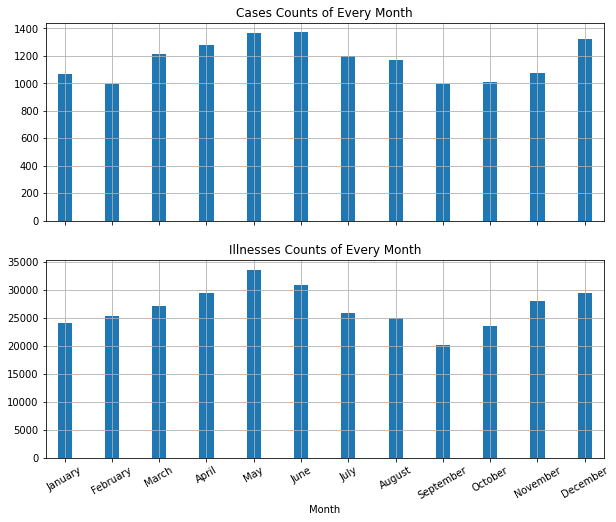

In [ ]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10,8))

# Cases Counts of Every Month
data['Month'].groupby(data['Month']).count().plot(ax=ax[0], kind='bar', grid=True, x = 'Months', y ='Cases Counts' , title = 'Cases Counts of Every Month',width =0.30)
# Illiness Counts of Every Month
data['Illnesses'].groupby(data['Month']).sum().plot(ax=ax[1], kind='bar', grid=True, x = 'Months', y ='Illnesses Counts' ,title = 'Illnesses Counts of Every Month',width =0.30)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation = 30)

plt.show()


## Years

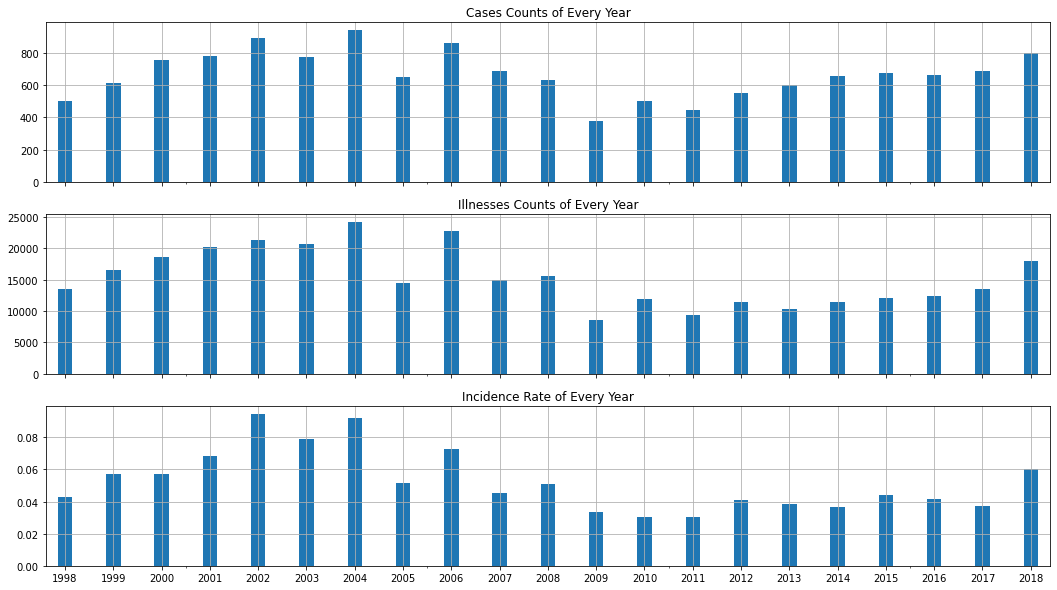

In [ ]:
fig, ax = plt.subplots(3, sharex=True, figsize=(18,10))

# Cases Counts of Every Year
data['Year'].groupby(data['Year']).count().plot(ax=ax[0], kind='bar', grid=True, x = 'Year', y ='Cases Counts' , title = 'Cases Counts of Every Year',width =0.30)
# Illiness Counts of Every Year
data['Illnesses'].groupby(data['Year']).sum().plot(ax=ax[1], kind='bar', grid=True, x = 'Year', y ='Illnesses Counts' ,title = 'Illnesses Counts of Every Year',width =0.30)
# Incidence Rate of Every Year
df_in_Rate.iloc[:,1:].mean().plot(ax=ax[2], kind='bar', grid=True, x = 'Year', y ='Incidence Rate' ,title = 'Incidence Rate of Every Year',width =0.30)
plt.xticks(rotation = 0)
plt.show()

## States

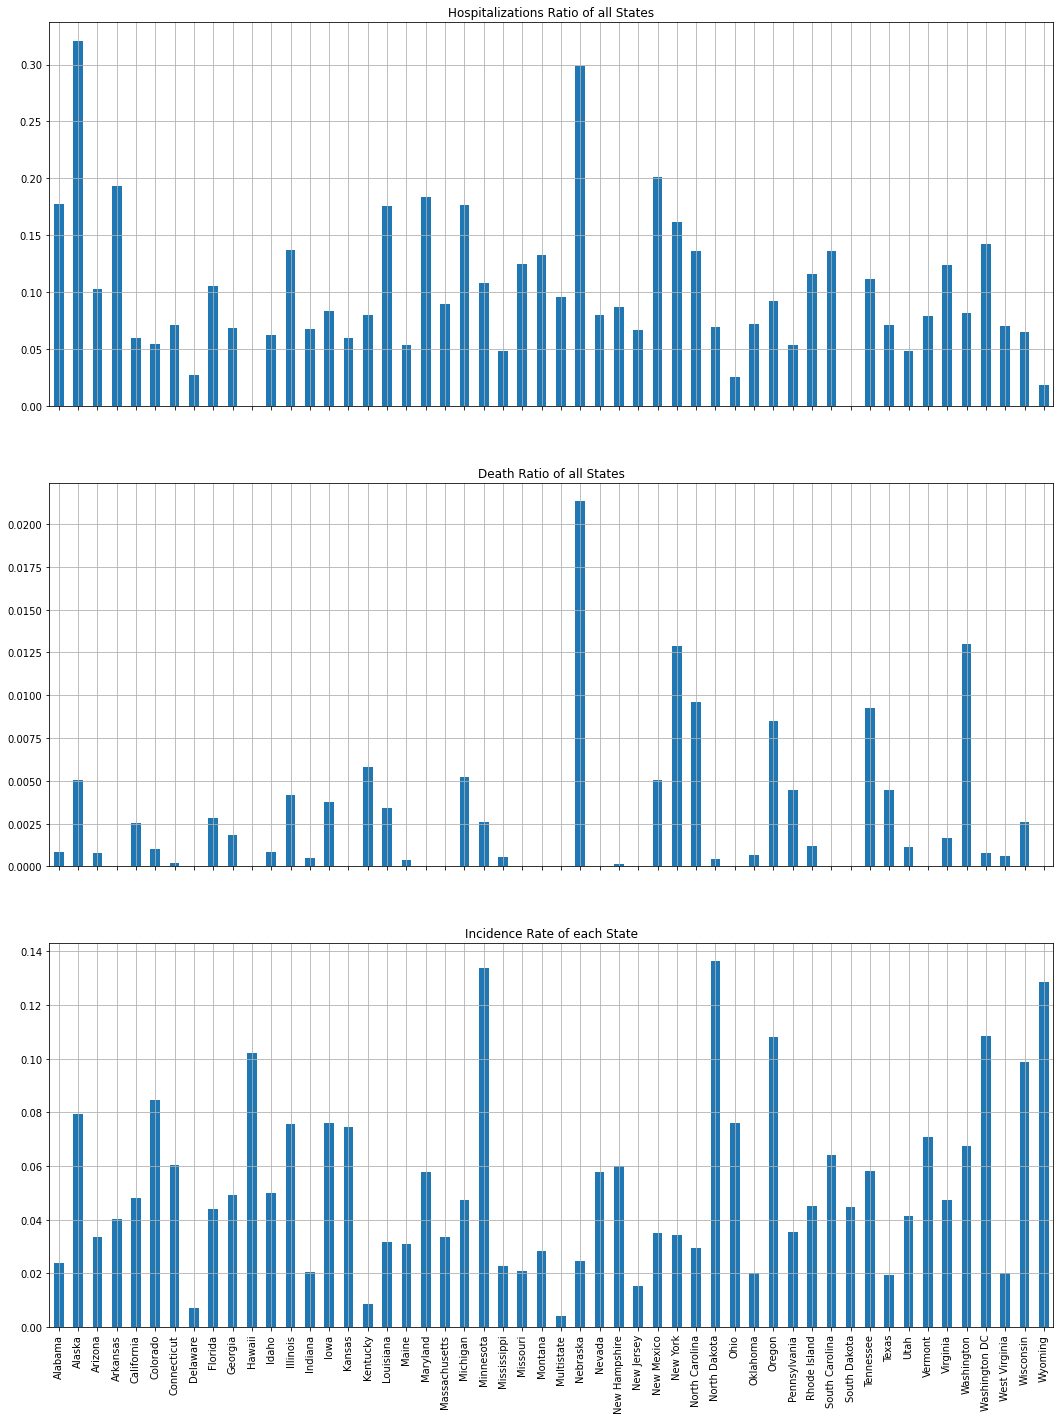

In [ ]:
fig, ax = plt.subplots(3, sharex=True, figsize=(18,24))
#Hospitalizations Ratio of all States
data['ratio_h'].groupby(data['State']).mean().plot(ax=ax[0], kind='bar', grid=True, x = 'State', y ='Hospitalizations Ratio (Hospitalizations/Illnesses)' ,title = 'Hospitalizations Ratio of all States')

#Death Ratio of all States 
data['ratio_d'].groupby(data['State']).mean().plot(ax=ax[1], kind='bar', grid=True, x = 'State', y ='Death Ratio (Death/Illnesses)' ,title = 'Death Ratio of all States')

# Incidence Rate of each State
df_in_Rate.mean(axis =1).plot(ax=ax[2], kind='bar', grid=True, x = 'State', y ='Incidence Rate' ,title = 'Incidence Rate of each State')

plt.xticks(np.arange(52),df_in_Rate['state'], rotation = 90)
plt.show()

## States vs Etiology

In [ ]:
states = ['Minnesota', 'Alaska', 'Alabama', 'Illinois', 'Pennsylvania',
       'Tennessee', 'New York', 'Massachusetts', 'Florida', 'Wisconsin',
       'Ohio', 'New Hampshire', 'Idaho', 'Michigan', 'Connecticut',
       'Oklahoma', 'South Carolina', 'Oregon', 'Hawaii', 'Mississippi',
       'California', 'Virginia', 'Arizona', 'Maryland', 'Georgia',
       'Missouri', 'Utah', 'Colorado', 'North Carolina', 'Kansas',
       'Nevada', 'North Dakota', 'Maine', 'Washington', 'Texas',
       'West Virginia', 'Puerto Rico', 'New Jersey', 'Wyoming',
       'Rhode Island', 'Vermont', 'Iowa', 'New Mexico', 'Multistate',
       'Kentucky', 'Montana', 'South Dakota', 'Delaware', 'Indiana',
       'Nebraska', 'Louisiana', 'Arkansas', 'Republic of Palau',
       'Washington DC', 'Guam']

In [ ]:
#retrive the data of each state

Minnesota = data[data['State'] == 'Minnesota']
Alaska = data[data['State'] == 'Alaska']
Alabama = data[data['State'] == 'Alabama']
Illinois = data[data['State'] == 'Illinois']
Pennsylvania = data[data['State'] == 'Pennsylvania']
Tennessee = data[data['State'] == 'Tennessee ']
New_York = data[data['State'] == 'New York']
Massachusetts = data[data['State'] == 'Massachusetts']
Florida = data[data['State'] == 'Florida ']
Wisconsin = data[data['State'] == 'Wisconsin']
Ohio = data[data['State'] == 'Ohio']
New_Hampshire = data[data['State'] == 'New Hampshire']
Idaho = data[data['State'] == 'Idaho']
Michigan = data[data['State'] == 'Michigan']
Connecticut = data[data['State'] == 'Connecticut']
Oklahoma = data[data['State'] == 'Oklahoma']
South_Carolina = data[data['State'] == 'South Carolina']
Oregon = data[data['State'] == 'Oregon']
Hawaii = data[data['State'] == 'Hawaii']
Mississippi = data[data['State'] == 'Mississippi']
California = data[data['State'] == 'California']
Virginia = data[data['State'] == 'Virginia']
Arizona = data[data['State'] == 'Arizona']
Maryland = data[data['State'] == 'Maryland']
Georgia = data[data['State'] == 'Georgia']
Missouri = data[data['State'] == 'Missouri']
Utah = data[data['State'] == 'Utah']
Colorado = data[data['State'] == 'Colorado']
North_Carolina = data[data['State'] == 'North Carolina']
Kansas = data[data['State'] == 'Kansas']
Nevada = data[data['State'] == 'Nevada']
North_Dakota = data[data['State'] == 'North Dakota']
Maine = data[data['State'] == 'Maine']
Washington = data[data['State'] == 'Washington']
Texas = data[data['State'] == 'Texas']
West_Virginia = data[data['State'] == 'West Virginia']
Puerto_Rico = data[data['State'] == 'Puerto Rico']
New_Jersey = data[data['State'] == 'New Jersey']
Wyoming = data[data['State'] == 'Wyoming']
Rhode = data[data['State'] == 'Rhode Island']
Vermont = data[data['State'] == 'Vermont']
Iowa = data[data['State'] == 'Iowa']
New_Mexico = data[data['State'] == 'New Mexico']
Multistate = data[data['State'] == 'Multistate']
Kentucky = data[data['State'] == 'Kentucky ']
Montana = data[data['State'] == 'Montana']
South_Dakota = data[data['State'] == 'South Dakota']
Delaware = data[data['State'] == 'Delaware']
Indiana = data[data['State'] == 'Indiana']
Nebraska = data[data['State'] == 'Nebraska']
Louisiana = data[data['State'] == 'Louisiana']
Arkansas = data[data['State'] == 'Arkansas']
Palau = data[data['State'] == 'Republic of Palau']
DC = data[data['State'] == 'Washington DC']
Guam = data[data['State'] == 'Guam']


Visualization

In [ ]:
y1 = Minnesota[etiology].sum()
y2 = Alaska[etiology].sum()
y3 = Alabama[etiology].sum()
y4 = Illinois[etiology].sum()
y5 = Pennsylvania[etiology].sum()
y6 = Tennessee[etiology].sum()
y7 = New_York[etiology].sum()
y8 = Massachusetts[etiology].sum()
y9 = Florida[etiology].sum()
y10 = Wisconsin[etiology].sum()
y11 = Ohio[etiology].sum()
y12 = New_Hampshire[etiology].sum()
y13 = Idaho[etiology].sum()
y14 = Michigan[etiology].sum()
y15 = Connecticut[etiology].sum()
y16 = Oklahoma[etiology].sum()
y17 = South_Carolina[etiology].sum()
y18 = Oregon[etiology].sum()
y19 = Hawaii[etiology].sum()
y20 = Mississippi[etiology].sum()
y21 = California[etiology].sum()
y22 = Virginia[etiology].sum()
y23 = Arizona[etiology].sum()
y24 = Maryland[etiology].sum()
y25 = Georgia[etiology].sum()
y26 = Missouri[etiology].sum()
y27 = Utah[etiology].sum()
y28 = Colorado[etiology].sum()
y29 = North_Carolina[etiology].sum()
y30 = Kansas[etiology].sum()
y31 = Nevada[etiology].sum()
y32 = North_Dakota[etiology].sum()
y33 = Maine[etiology].sum()
y34 = Washington[etiology].sum()
y35 = Texas[etiology].sum()
y36 = West_Virginia[etiology].sum()
y37 = Puerto_Rico[etiology].sum()
y38 = New_Jersey[etiology].sum()
y39 = Wyoming[etiology].sum()
y40 = Rhode[etiology].sum()
y41 = Vermont[etiology].sum()
y42 = Iowa[etiology].sum()
y43 = New_Mexico[etiology].sum()
y44 = Multistate[etiology].sum()
y45 = Kentucky[etiology].sum()
y46 = Montana[etiology].sum()
y47 = South_Dakota[etiology].sum()
y48 = Delaware[etiology].sum()
y49 = Indiana[etiology].sum()
y50 = Nebraska[etiology].sum()
y51 = Louisiana[etiology].sum()
y52 = Arkansas[etiology].sum()
y53 = Palau[etiology].sum()
y54 = DC[etiology].sum()
y55 = Guam[etiology].sum()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

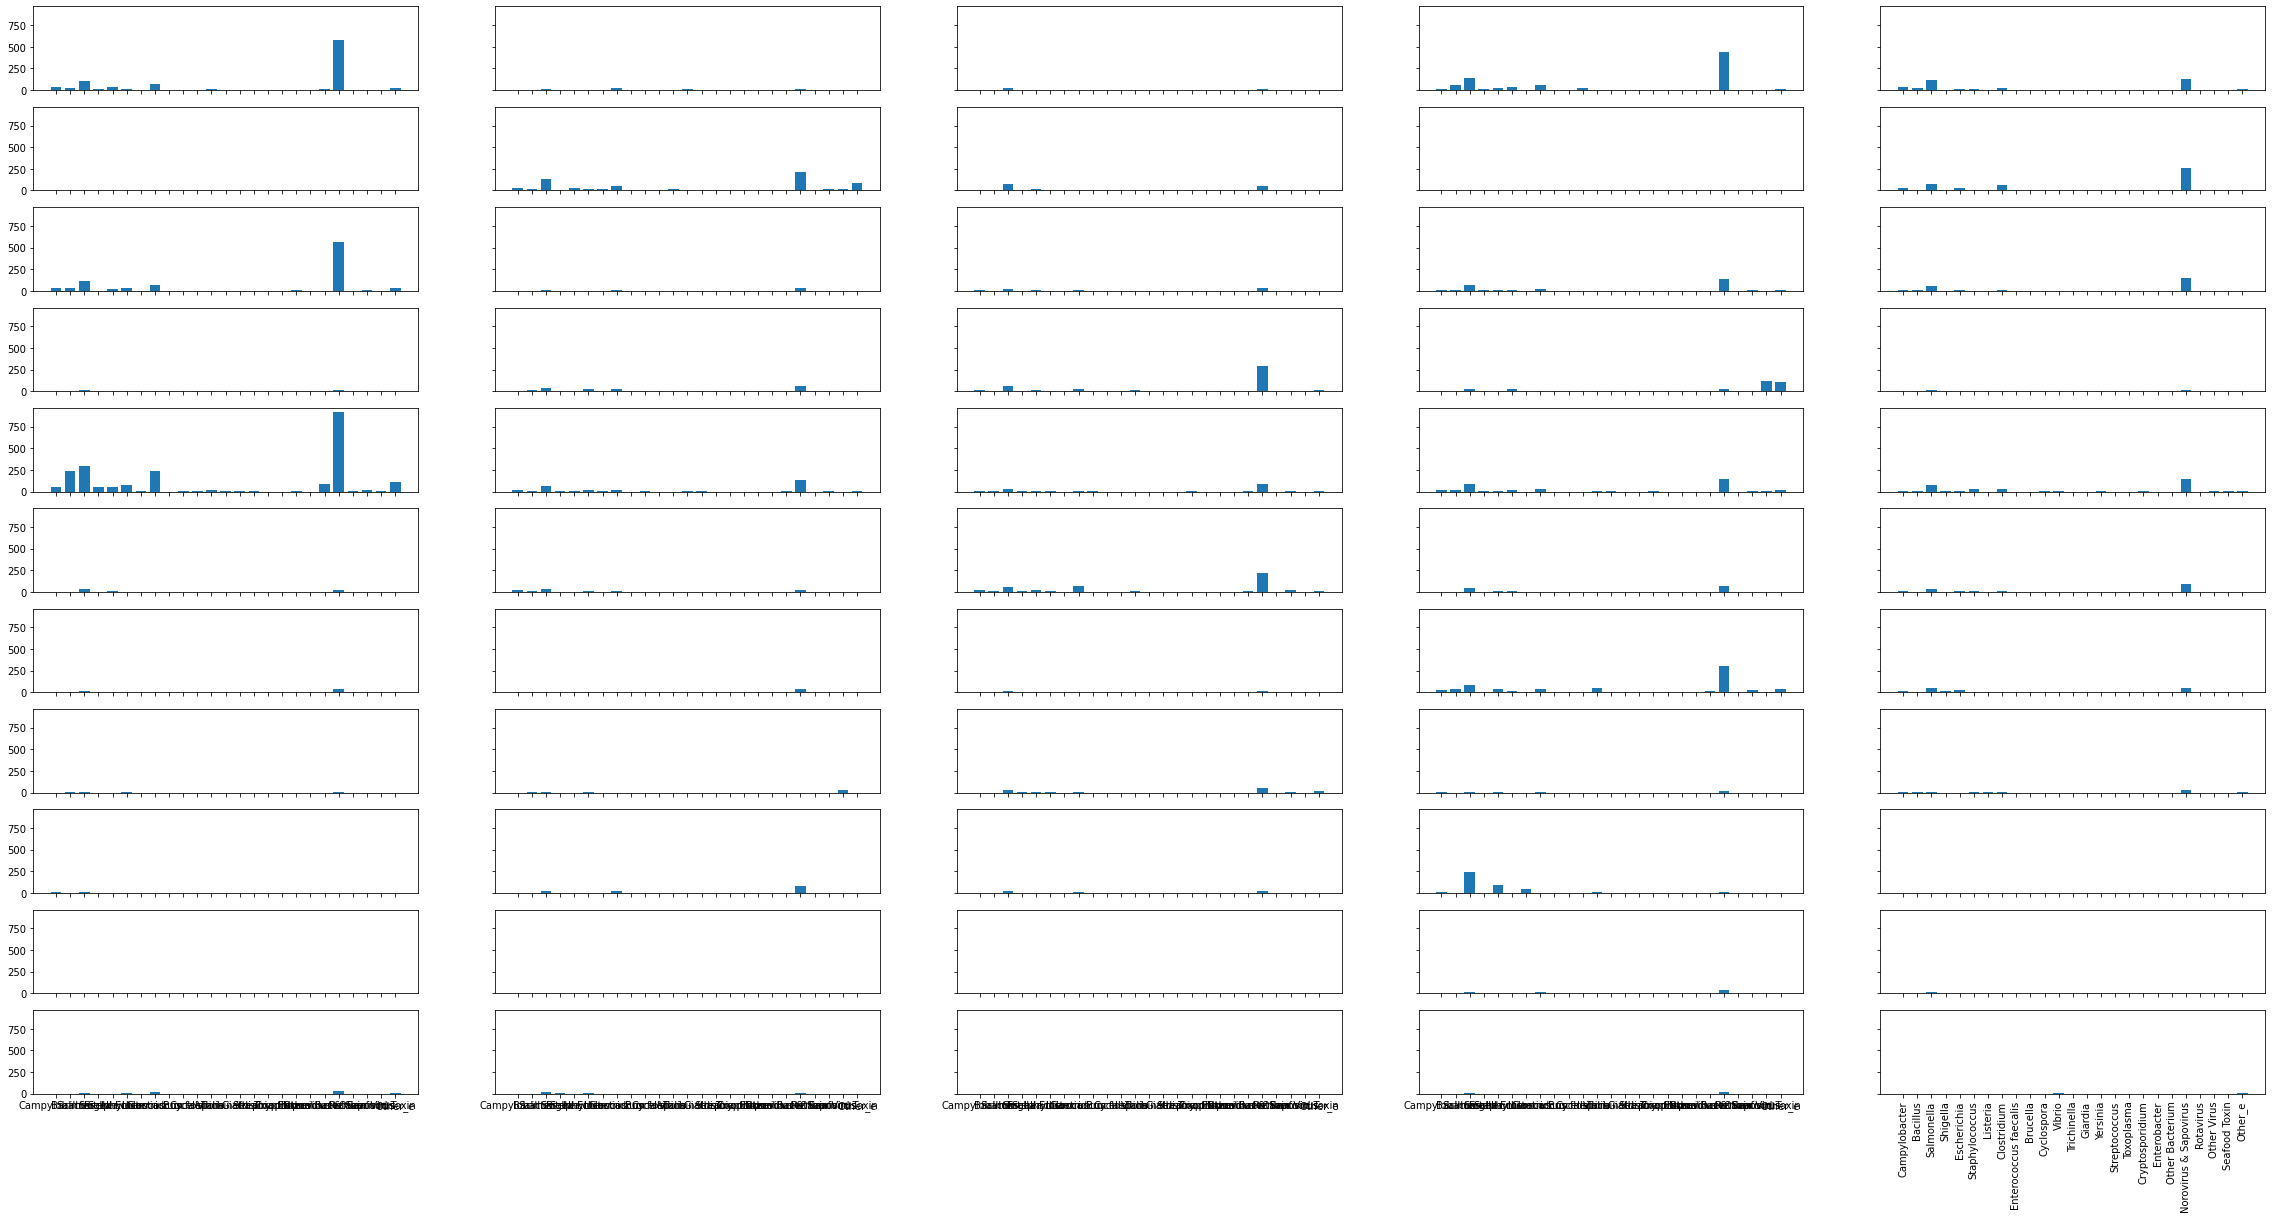

In [ ]:
x_labels = etiology 
width = 0.75

# Plot the figure.
fig, ax = plt.subplots(11,5, figsize=(40,20),sharex=True,sharey=True)    
ax[0,0].bar(x_labels, y1, width)
ax[0,1].bar(x_labels, y2, width)
ax[0,2].bar(x_labels, y3, width)
ax[0,3].bar(x_labels, y4, width)
ax[0,4].bar(x_labels, y5, width)

ax[1,0].bar(x_labels, y6, width)
ax[1,1].bar(x_labels, y7, width)
ax[1,2].bar(x_labels, y8, width)
ax[1,3].bar(x_labels, y9, width)
ax[1,4].bar(x_labels, y10, width)

ax[2,0].bar(x_labels, y11, width)
ax[2,1].bar(x_labels, y12, width)
ax[2,2].bar(x_labels, y13, width)
ax[2,3].bar(x_labels, y14, width)
ax[2,4].bar(x_labels, y15, width)

ax[3,0].bar(x_labels, y16, width)
ax[3,1].bar(x_labels, y17, width)
ax[3,2].bar(x_labels, y18, width)
ax[3,3].bar(x_labels, y19, width)
ax[3,4].bar(x_labels, y20, width)

ax[4,0].bar(x_labels, y21, width)
ax[4,1].bar(x_labels, y22, width)
ax[4,2].bar(x_labels, y23, width)
ax[4,3].bar(x_labels, y24, width)
ax[4,4].bar(x_labels, y25, width)

ax[5,0].bar(x_labels, y26, width)
ax[5,1].bar(x_labels, y27, width)
ax[5,2].bar(x_labels, y28, width)
ax[5,3].bar(x_labels, y29, width)
ax[5,4].bar(x_labels, y30, width)

ax[6,0].bar(x_labels, y31, width)
ax[6,1].bar(x_labels, y32, width)
ax[6,2].bar(x_labels, y33, width)
ax[6,3].bar(x_labels, y34, width)
ax[6,4].bar(x_labels, y35, width)

ax[7,0].bar(x_labels, y36, width)
ax[7,1].bar(x_labels, y37, width)
ax[7,2].bar(x_labels, y38, width)
ax[7,3].bar(x_labels, y39, width)
ax[7,4].bar(x_labels, y40, width)


ax[8,0].bar(x_labels, y41, width)
ax[8,1].bar(x_labels, y42, width)
ax[8,2].bar(x_labels, y43, width)
ax[8,3].bar(x_labels, y44, width)
ax[8,4].bar(x_labels, y45, width)

ax[9,0].bar(x_labels, y46, width)
ax[9,1].bar(x_labels, y47, width)
ax[9,2].bar(x_labels, y48, width)
ax[9,3].bar(x_labels, y49, width)
ax[9,4].bar(x_labels, y50, width)

ax[10,0].bar(x_labels, y51, width)
ax[10,1].bar(x_labels, y52, width)
ax[10,2].bar(x_labels, y53, width)
ax[10,3].bar(x_labels, y54, width)
ax[10,4].bar(x_labels, y55, width)




#Minnesota,Illinois,Pennsylvania
#New_York,Wisconsin
#Ohio
#Connecticut
#
#California
plt.xticks(rotation=90)

### Visualization of Indivisual State

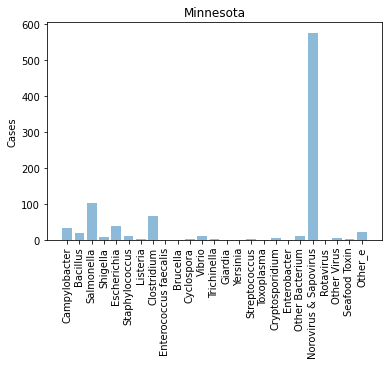

In [ ]:
#Minnesota [0,0]
x = etiology
y = Minnesota[etiology].sum()

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(rotation =90)
plt.ylabel('Cases')
plt.title('Minnesota')
plt.show()

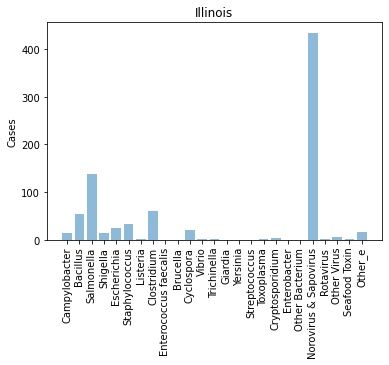

In [ ]:
#Illinois [0,3]
x = etiology
y = Illinois[etiology].sum()

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(rotation =90)
plt.ylabel('Cases')
plt.title('Illinois')
plt.show()

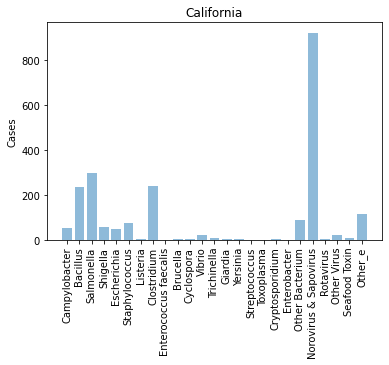

In [ ]:
#California, [5,0]
x = etiology
y = California[etiology].sum()

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(rotation =90)
plt.ylabel('Cases')
plt.title('California')
plt.show()


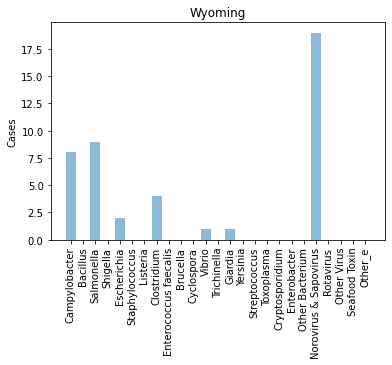

In [ ]:
#Wyoming [7,3]
x = etiology
y = Wyoming[etiology].sum()

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(rotation =90)
plt.ylabel('Cases')
plt.title('Wyoming')
plt.show()

# Using ML to analyze

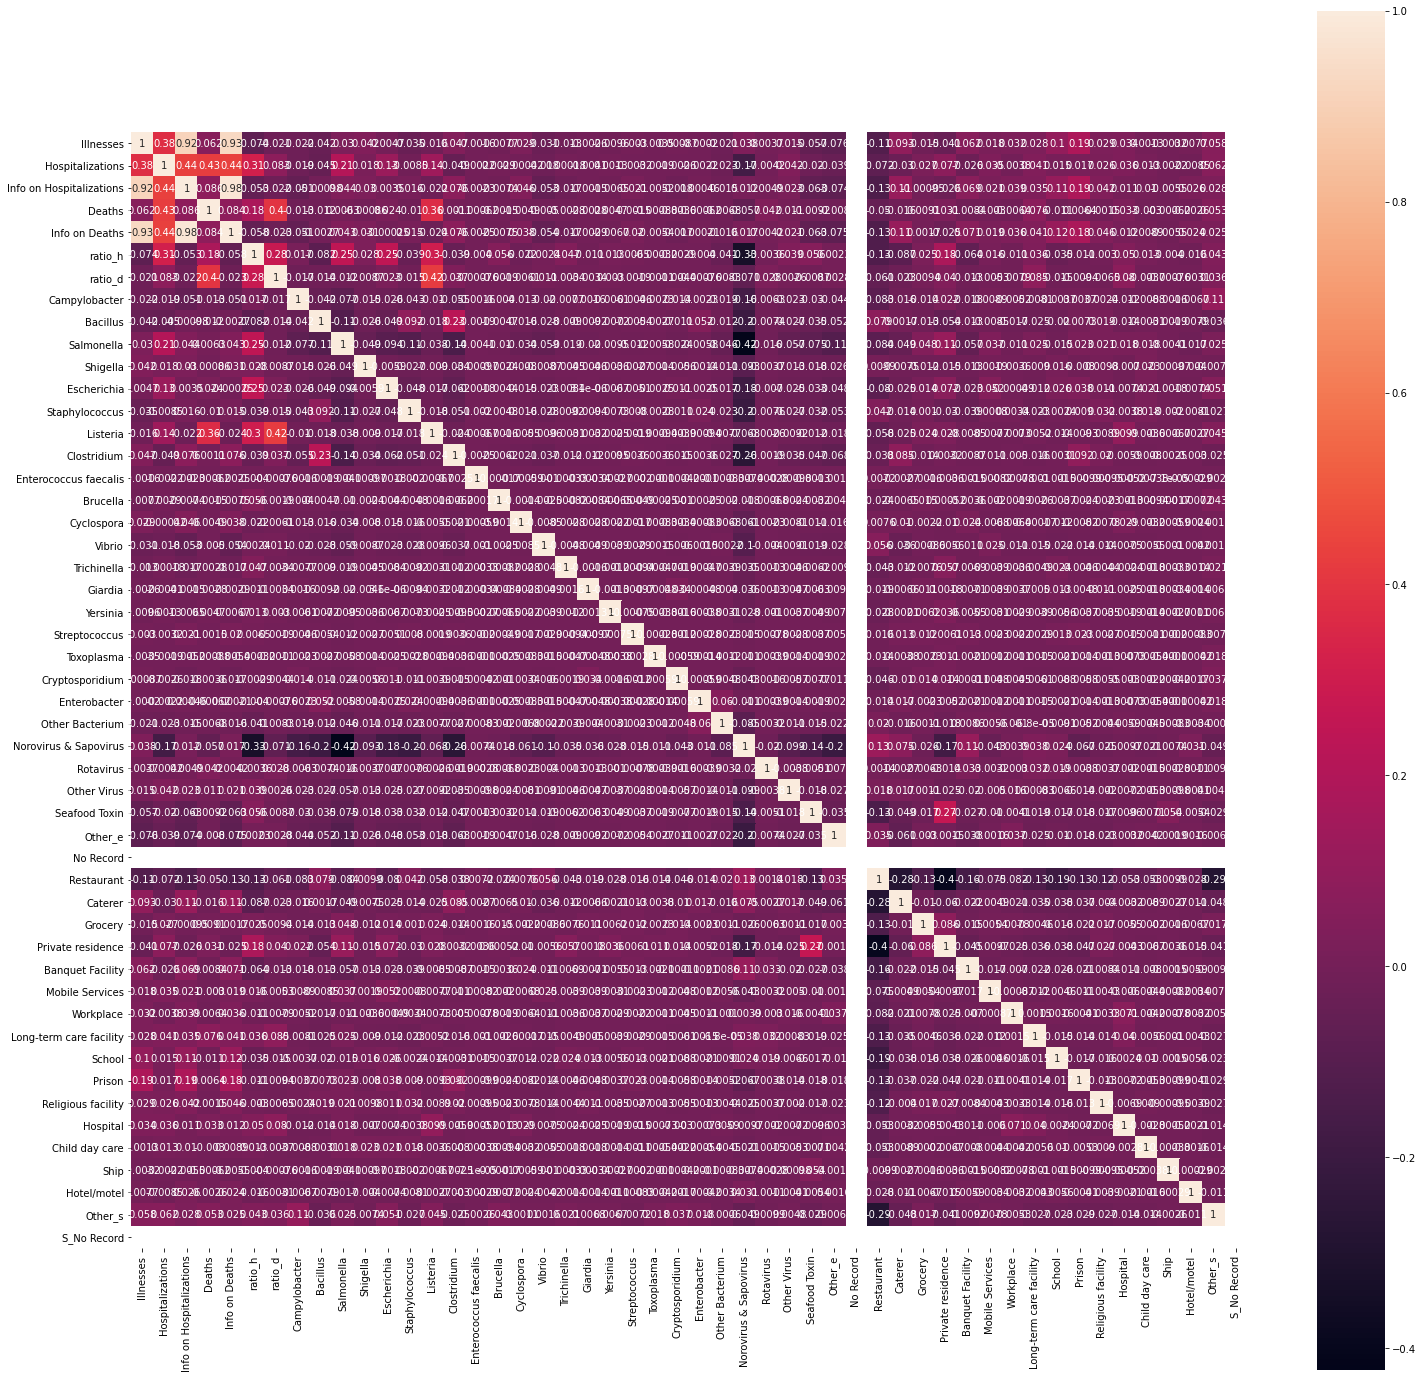

In [ ]:
plt.figure(figsize=(25,25)) 
sns.heatmap(data[data.columns[2:]].corr(), annot=True,square=True) 

In [ ]:
data_state = data.groupby('State').sum()
data_state.describe()

,Year,Month,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,ratio_h,ratio_d,Campylobacter,Bacillus,Salmonella,Shigella,Escherichia,Staphylococcus,Listeria,Clostridium,Enterococcus faecalis,Brucella,Cyclospora,Vibrio,Trichinella,Giardia,Yersinia,Streptococcus,Toxoplasma,Cryptosporidium,Enterobacter,Other Bacterium,Norovirus & Sapovirus,Rotavirus,Other Virus,Seafood Toxin,Other_e,No Record,Restaurant,Caterer,Grocery,Private residence,Banquet Facility,Mobile Services,Workplace,Long-term care facility,School,Prison,Religious facility,Hospital,Child day care,Ship,Hotel/motel,Other_s,S_No Record
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,5.131851e+05,1659.836364,5846.945455,283.490909,1784.872727,6.600000,1852.309091,19.817035,0.626782,9.200000,12.600000,48.563636,3.309091,11.109091,13.090909,1.581818,21.181818,0.018182,0.109091,1.236364,3.745455,0.400000,0.418182,0.254545,0.145455,0.036364,0.618182,0.036364,2.436364,111.654545,0.272727,3.436364,6.054545,12.545455,0.0,147.800000,23.072727,9.018182,40.254545,7.618182,2.400000,2.145455,3.836364,7.909091,3.472727,3.181818,0.963636,0.527273,0.018182,0.309091,21.418182,0.0
std,7.293474e+05,2354.351871,7021.245214,645.933544,2071.911785,24.652098,2159.354438,25.899816,1.392599,11.874966,35.312153,58.860716,8.346374,16.174595,32.307133,6.494131,37.097015,0.134840,0.368818,2.956247,9.195849,1.355373,1.012714,0.644584,0.355808,0.188919,1.146507,0.188919,11.745391,176.521766,0.911948,5.887097,22.741232,27.280992,0.0,243.663657,30.520700,14.855465,52.022153,11.337403,3.159934,3.983383,4.821878,7.386857,3.999327,4.472512,1.490260,1.015702,0.134840,0.766733,30.052233,0.0
min,2.005000e+03,9.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,9.336550e+04,308.500000,1371.000000,47.000000,412.500000,0.000000,415.000000,4.051384,0.000000,1.000000,0.500000,9.500000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,1.000000,0.0,17.000000,5.000000,1.000000,7.500000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0
50%,2.132310e+05,691.000000,2802.000000,137.000000,947.000000,2.000000,950.000000,8.520218,0.143369,4.000000,2.000000,28.000000,1.000000,5.000000,4.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,1.000000,0.000000,2.000000,0.0,48.000000,9.000000,3.000000,20.000000,3.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.0
75%,6.278265e+05,2061.000000,8466.500000,264.500000,2459.500000,4.000000,2506.500000,22.097157,0.508452,12.000000,7.500000,64.000000,3.000000,15.000000,11.500000,1.000000,26.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,135.500000,0.000000,4.000000,1.500000,10.000000,0.0,160.000000,32.000000,10.000000,50.000000,9.500000,4.000000,3.000000,5.000000,13.000000,5.000000,

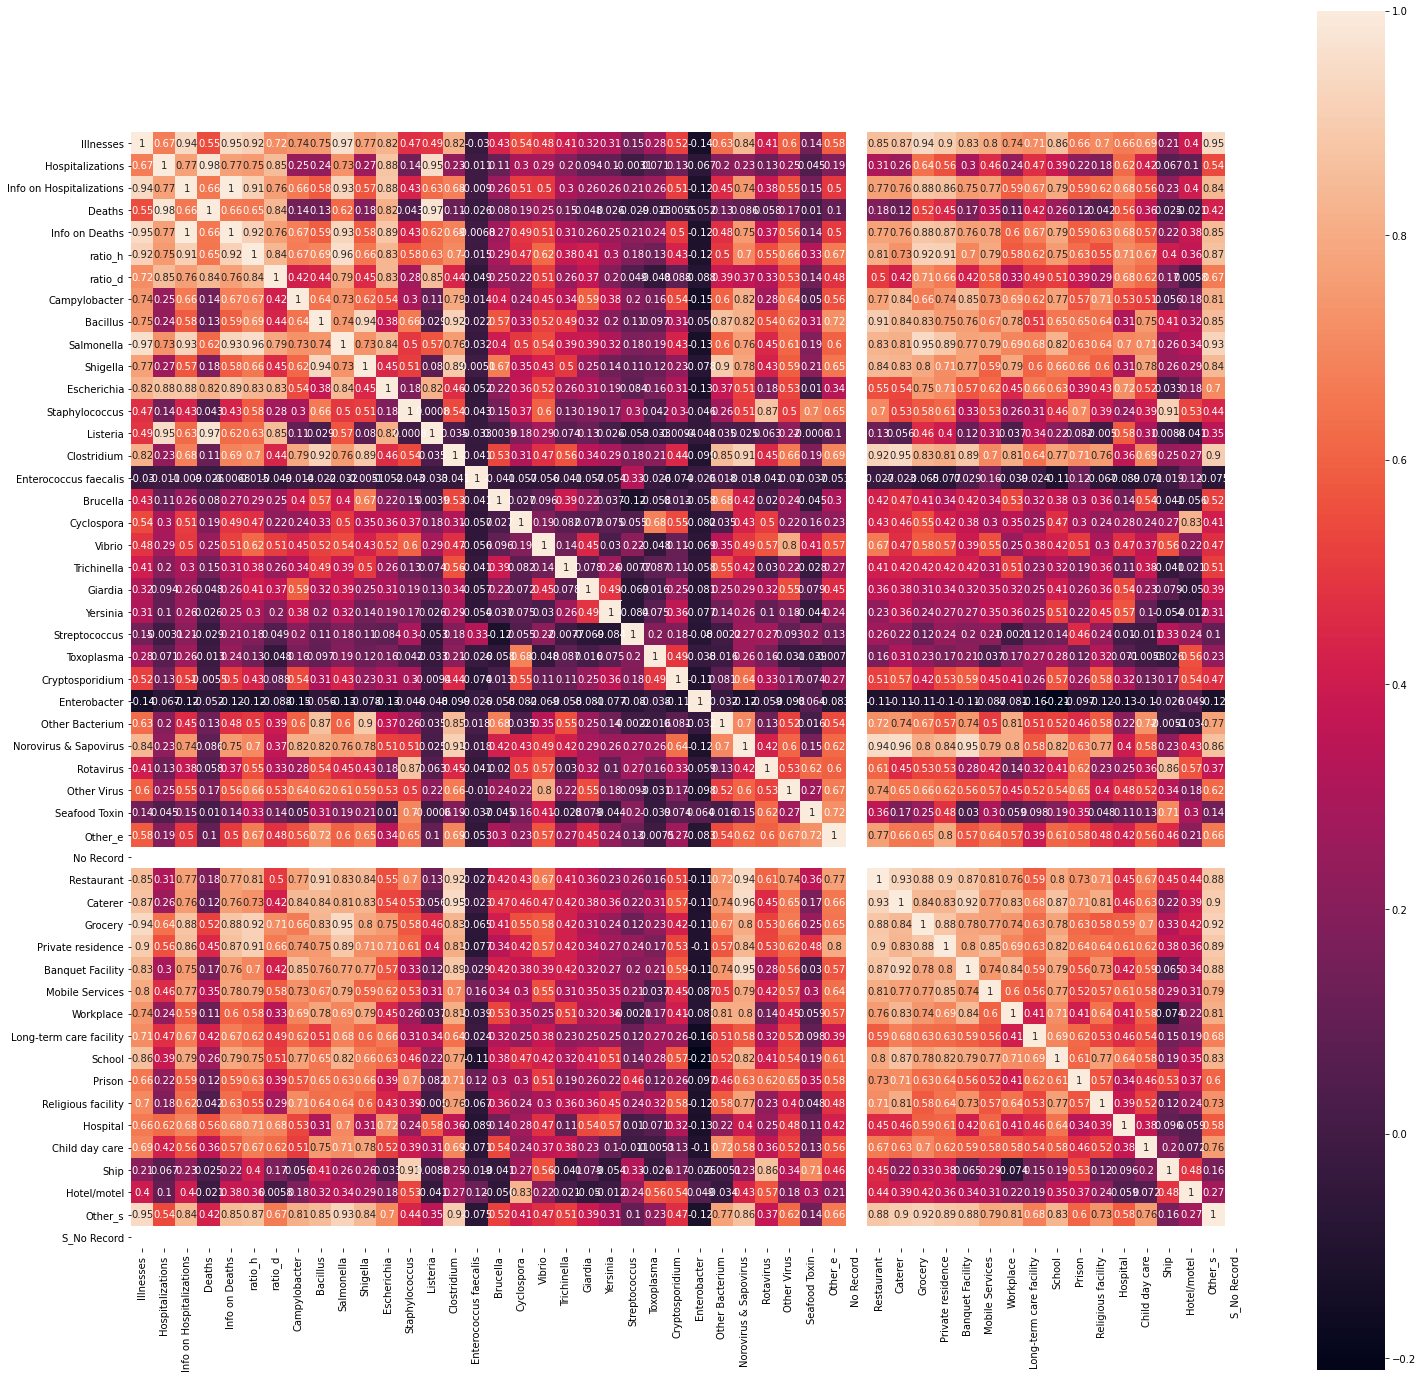

In [ ]:
plt.figure(figsize=(25,25)) 
sns.heatmap(data_state[data_state.columns[2:]].corr(), annot=True,square=True) 

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Prediction of Illnesses

In [ ]:
features = etiology + setting
X = data[features]
y = data['Illnesses']

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)

In [ ]:
# Support Vector Regression
svr = svm.SVR()
svr.fit(train_X,train_y)
y_pred_svr = svr.predict(val_X)

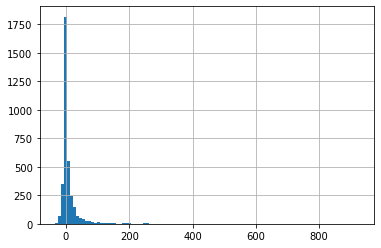

In [ ]:
errors_svr = val_y - y_pred_svr
errors_svr.hist(bins=100)

In [ ]:
#Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=123)
tree.fit(train_X, train_y)
y_pred_tree = tree.predict(val_X)

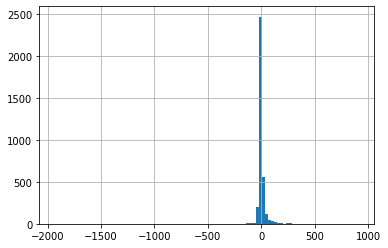

In [ ]:
errors_tree = val_y - y_pred_tree
errors_tree.hist(bins=100)

In [ ]:
importance = tree.feature_importances_
dict(zip(features,importance))

{'Bacillus': 0.008970730081592958,
 'Banquet Facility': 0.04462478740367197,
 'Brucella': 9.570092312409929e-05,
 'Campylobacter': 0.04829527646910396,
 'Caterer': 0.0394925989425001,
 'Child day care': 0.0022842515882203376,
 'Clostridium': 0.013853954340343581,
 'Cryptosporidium': 0.0008157192012481923,
 'Cyclospora': 0.004344159836993581,
 'Enterobacter': 3.2996121173503645e-05,
 'Enterococcus faecalis': 6.592093792523852e-06,
 'Escherichia': 0.03963920359820277,
 'Giardia': 0.00020970088513438633,
 'Grocery': 0.17279433061158372,
 'Hospital': 0.019274858956583926,
 'Hotel/motel': 0.0004435642279998618,
 'Listeria': 0.00027531502934760794,
 'Long-term care facility': 0.012821858065063599,
 'Mobile Services': 0.006212237760858231,
 'Norovirus & Sapovirus': 0.041401759946839777,
 'Other Bacterium': 0.003865604832111319,
 'Other Virus': 0.0009056510635075725,
 'Other_e': 0.010813001881664923,
 'Other_s': 0.028365433221746433,
 'Prison': 0.09640140434520113,
 'Private residence': 0.0501

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state = 123)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(val_X)

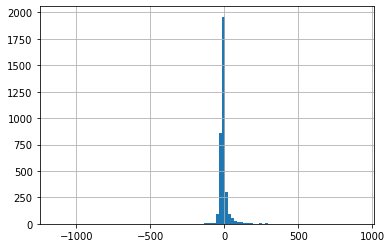

In [ ]:
errors_rf = val_y - y_pred_rf
errors_rf.hist(bins=100)

Optmize the model

In [ ]:
init_features = features
from random import random, randint, choice
from sklearn.metrics import mean_absolute_error

def diff(li1,li2):
  return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

def step(features):
  ### randomly decide to add or remove a feature
  
  if random()<0.5: 
    indx = randint(0,len(features)-1)
    print("removing",features[indx])
    features.remove(features[indx])
    return(features)
  else:
    ### what features are unused?
    d = diff(features,init_features)
    if not d:
      print("do nothing")
      return(features)
    else:
      f = choice(d)
      print("adding",f)
      features.append(f)
      return(features)


def evaluate(features):
  x = data[features]
  y = data['Illnesses']
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
  prediction = rf.predict(val_X)
  val_mae = mean_absolute_error(prediction, val_y)
  return(val_mae)

def optmize():
  print("###")
  start_feartures = etiology + setting
  ff = start_feartures
  old_mae = 10000000

  for i in range(10):
    new_features = step(ff)
    mae = evaluate(new_features)
    ### gradient descent
    print(i, mae, features)
    if mae < old_mae:
      ff = new_features
      old_mae = mae
      print("accepting result")
    else:
      print("rejecting result")

In [ ]:
optmize()

###
do nothing
0 19.358224509472183 ['Campylobacter', 'Bacillus', 'Salmonella', 'Shigella', 'Escherichia', 'Staphylococcus', 'Listeria', 'Clostridium', 'Enterococcus faecalis', 'Brucella', 'Cyclospora', 'Vibrio', 'Trichinella', 'Giardia', 'Yersinia', 'Streptococcus', 'Toxoplasma', 'Cryptosporidium', 'Enterobacter', 'Other Bacterium', 'Norovirus & Sapovirus', 'Rotavirus', 'Other Virus', 'Seafood Toxin', 'Other_e', 'Restaurant', 'Caterer', 'Grocery', 'Private residence', 'Banquet Facility', 'Mobile Services', 'Workplace', 'Long-term care facility', 'School', 'Prison', 'Religious facility', 'Hospital', 'Child day care', 'Ship', 'Hotel/motel', 'Other_s']
accepting result
removing Enterococcus faecalis
1 19.358224509472183 ['Campylobacter', 'Bacillus', 'Salmonella', 'Shigella', 'Escherichia', 'Staphylococcus', 'Listeria', 'Clostridium', 'Enterococcus faecalis', 'Brucella', 'Cyclospora', 'Vibrio', 'Trichinella', 'Giardia', 'Yersinia', 'Streptococcus', 'Toxoplasma', 'Cryptosporidium', 'Entero

Prediction of Hospitalizations

In [ ]:
data['Hospitalizations'].unique()

array([  0.,   1.,   2.,   4.,  nan,   5.,   3.,  14.,   7.,   8.,   6.,
        17.,  13.,  10.,  28.,  11.,  35.,  19.,  52.,   9.,  36.,  15.,
        31., 143.,  30.,  21.,  40.,  55.,  94.,  33.,  50.,  22.,  23.,
        70.,  48.,  34.,  18.,  25., 129.,  16.,  12.,  47., 101.,  24.,
        29.,  60.,  58.,  20.,  43.,  56.,  27.,  39., 103., 108.,  71.,
        32.,  49.,  57.,  68.,  45.,  54., 104.,  26.,  37., 133., 124.])

In [ ]:
data_h = data[data['Hospitalizations'].notna()]

In [ ]:
X = data_h[features]
y = data_h['Hospitalizations']

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)

In [ ]:
#Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=123)
tree.fit(train_X, train_y)
y_pred_tree = tree.predict(val_X)

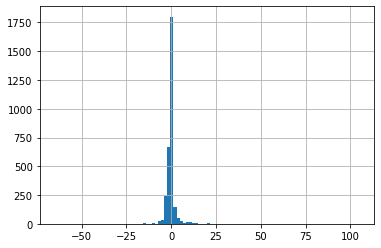

In [ ]:
errors_tree = val_y - y_pred_tree
errors_tree.hist(bins=100)

In [ ]:
importance = tree.feature_importances_
dict(zip(features,importance))

{'Bacillus': 0.0012321390456560422,
 'Banquet Facility': 0.0038446017250230486,
 'Brucella': 5.368771871104294e-05,
 'Campylobacter': 0.0118341162078667,
 'Caterer': 0.028102088231943455,
 'Child day care': 0.0010456955561343325,
 'Clostridium': 0.005848701103201561,
 'Cryptosporidium': 0.0006903506094417364,
 'Cyclospora': 0.00158364790784799,
 'Enterobacter': 0.0,
 'Enterococcus faecalis': 8.366912304950124e-07,
 'Escherichia': 0.09698226672140986,
 'Giardia': 0.0008286271497221427,
 'Grocery': 0.026566687415638682,
 'Hospital': 0.01089333857291755,
 'Hotel/motel': 9.372358155769245e-05,
 'Listeria': 0.11104063935037806,
 'Long-term care facility': 0.014611710757583385,
 'Mobile Services': 0.017582199013520167,
 'Norovirus & Sapovirus': 0.0032249160503146756,
 'Other Bacterium': 0.0003122587692839567,
 'Other Virus': 0.009549260133073353,
 'Other_e': 0.007378366891465506,
 'Other_s': 0.09467872840664306,
 'Prison': 0.014863054704056633,
 'Private residence': 0.10976416808569678,
 'Re

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state = 123)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(val_X)

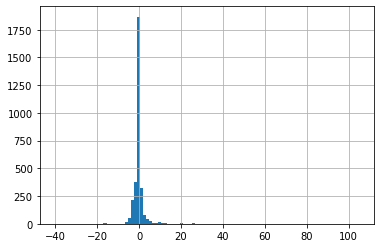

In [ ]:
errors_rf = val_y - y_pred_rf
errors_rf.hist(bins=100)

In [ ]:
data_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12336 entries, 0 to 21928
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      12336 non-null  int64  
 1   Month                     12336 non-null  int64  
 2   State                     12336 non-null  object 
 3   Primary Mode              12336 non-null  object 
 4   Etiology                  12336 non-null  object 
 5   Etiology Status           12336 non-null  object 
 6   Setting                   12336 non-null  object 
 7   Illnesses                 12336 non-null  int64  
 8   Hospitalizations          12336 non-null  float64
 9   Info on Hospitalizations  5769 non-null   float64
 10  Deaths                    12091 non-null  float64
 11  Info on Deaths            5761 non-null   float64
 12  ratio_h                   12336 non-null  float64
 13  ratio_d                   12091 non-null  float64
 14  Campyl